In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.model_selection as skmodel
from sklearn import tree
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import fbeta_score, cohen_kappa_score
SEED = 42
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold


from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import LinearSVC, SVC
#设置出图显示中文
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [5]:
diabetes = pd.read_csv('diabetes1.csv')

In [6]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# data overview
print ('Rows     : ', diabetes.shape[0])
print ('Columns  : ', diabetes.shape[1])
print ('\nFeatures : \n', diabetes.columns.tolist())
print ('\nMissing values :  ', diabetes.isnull().sum().values.sum())
print ('\nUnique values :  \n', diabetes.nunique())

Rows     :  768
Columns  :  9

Features : 
 ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Missing values :   0

Unique values :  
 Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64


In [8]:
# proportion of diabetes patients (about 35% having diabetes)
diabetes.Outcome.value_counts()[1] / diabetes.Outcome.count()

0.3489583333333333

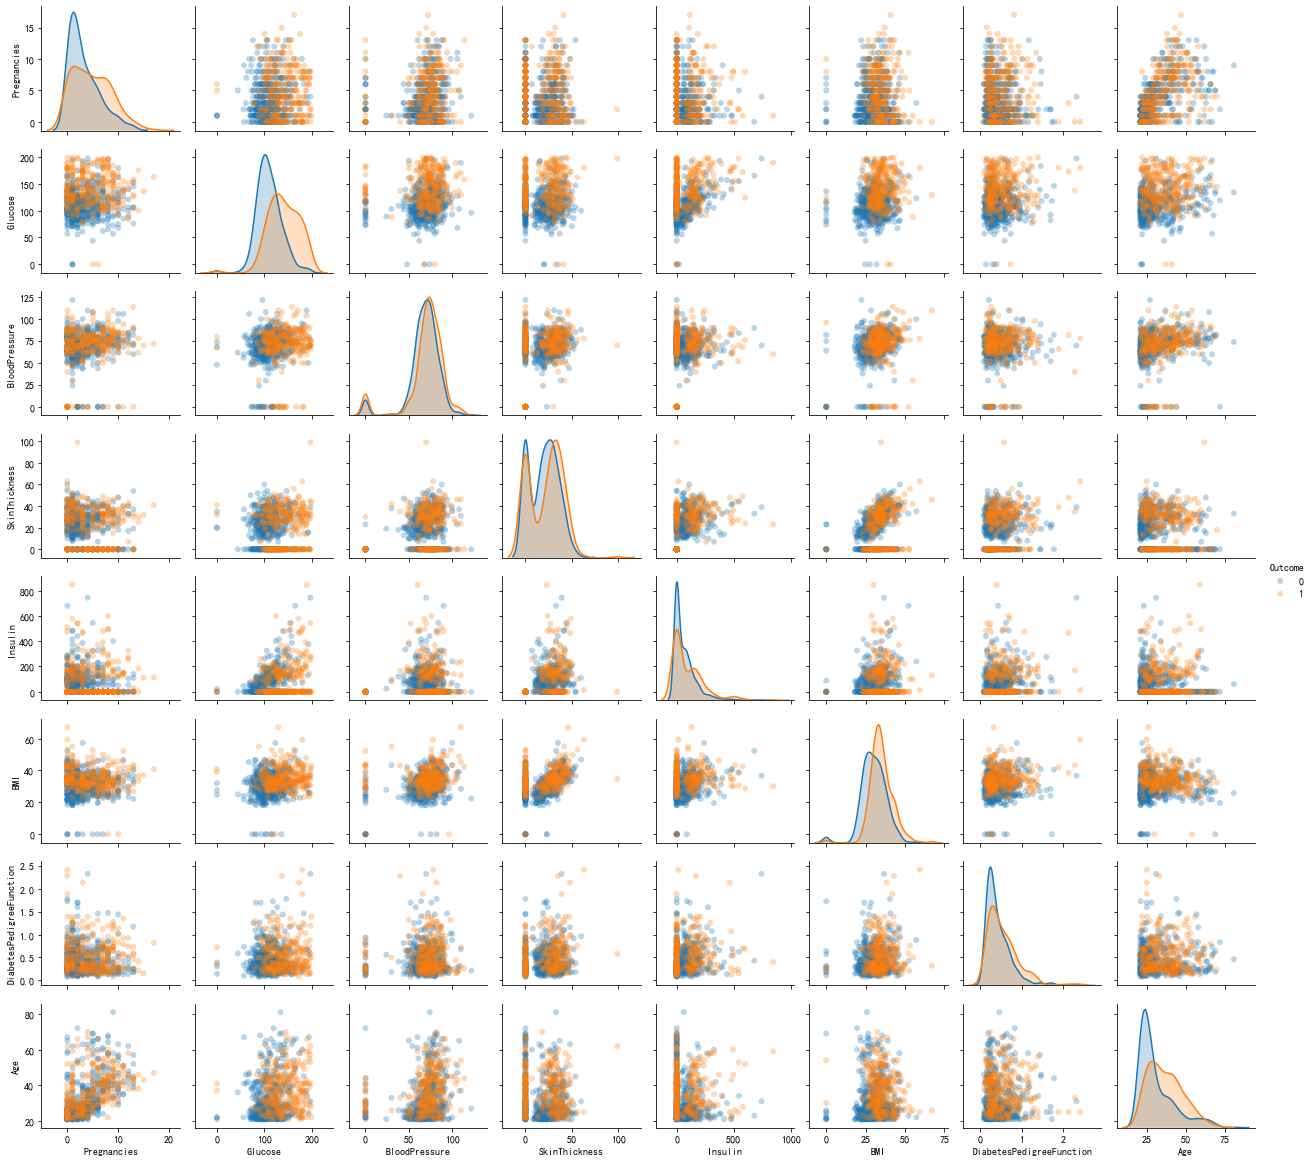

In [11]:
# to visualise pair plot
sns.pairplot(diabetes, hue='Outcome', plot_kws=dict(alpha=.3, edgecolor='none'), height=2, aspect=1.1)

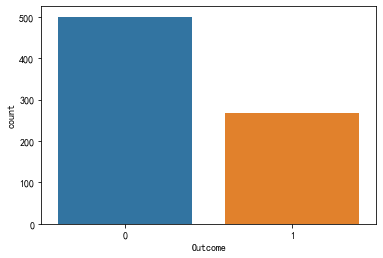

In [12]:
sns.countplot(diabetes['Outcome'],label="Count")

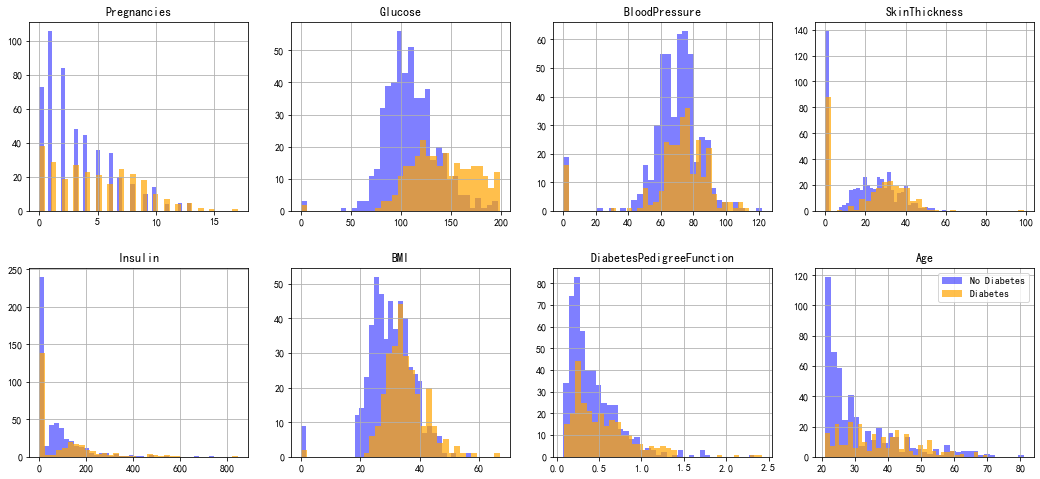

In [14]:
# To analyse feature-outcome distribution in visualisation
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

ROWS, COLS = 2, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18,8) )
row, col = 0, 0
for i, feature in enumerate(features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    
#     df[feature].hist(bins=35, color='green', alpha=0.5, ax=ax[row, col]).set_title(feature)  #show all, comment off below 2 lines
    diabetes[diabetes.Outcome==0][feature].hist(bins=35, color='blue', alpha=0.5, ax=ax[row, col]).set_title(feature)
    diabetes[diabetes.Outcome==1][feature].hist(bins=35, color='orange', alpha=0.7, ax=ax[row, col])
    
plt.legend(['No Diabetes', 'Diabetes'])
fig.subplots_adjust(hspace=0.3)

逻辑回归

In [15]:
x_train,x_test,y_train,y_test = skmodel.train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'],
    diabetes['Outcome'], stratify=diabetes['Outcome'],
    random_state=42,train_size=0.7)
x_train=x_train.astype('int')
y_train=y_train.astype('int')
x_test=x_test.astype('int')
y_test=y_test.astype('int')

In [17]:
logreg = LogisticRegression(solver='liblinear').fit(x_train, y_train)
print("Training set score : {:.3f}".format(logreg.score(x_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(x_test, y_test)))
logregl = LogisticRegression(solver='lbfgs').fit(x_train, y_train)
print("Training set score : {:.3f}".format(logregl.score(x_train, y_train)))
print("Test set score: {:.3f}".format(logregl.score(x_test, y_test)))
logreg5 = LogisticRegression(C = 1,solver='liblinear').fit(x_train, y_train)
print("Training set score : {:.3f}".format(logreg5.score(x_train, y_train)))
print("Test set score: {:.3f}".format(logreg5.score(x_test, y_test)))

Training set score : 0.786
Test set score: 0.749
Training set score : 0.784
Test set score: 0.736
Training set score : 0.786
Test set score: 0.749


Text(0, 0.5, 'ACC')

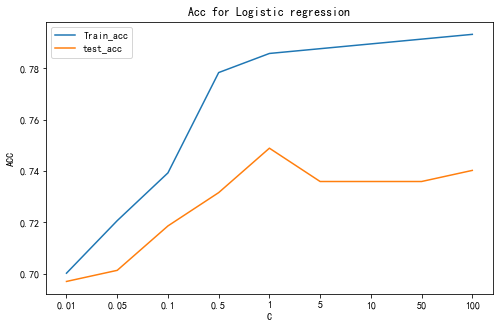

In [18]:
x=[10,20,30,40,50,60,70,80,90]
C = [0.01,0.05,0.1,0.5,1,5,10,50,100]
train_acc = []
test_acc = []
for k2 in C:
    logreg1 = LogisticRegression(C = k2,solver='liblinear').fit(x_train, y_train)
    train_acc.append(logreg1.score(x_train, y_train))
    test_acc.append(logreg1.score(x_test, y_test))
plt.figure(figsize=(8,5))
plt.plot(x,train_acc,label='Train_acc')
plt.plot(x,test_acc,label='test_acc')
plt.legend()
_ = plt.xticks(x,C) 
plt.title('Acc for Logistic regression')
plt.xlabel('C')
plt.ylabel('ACC')

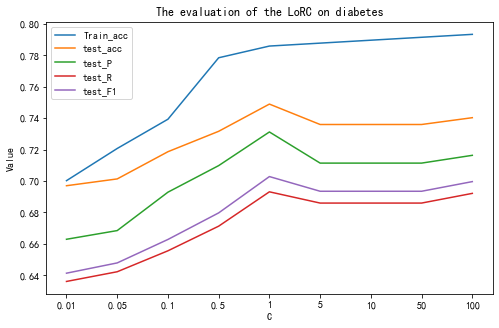

In [20]:
#查准率，召回率,f1
x=[10,20,30,40,50,60,70,80,90]  
x_index = [0.01,0.05,0.1,0.5,1,5,10,50,100]
train_acc1 = []
y = []
#C1 = []
test_accuracy_score = []
test_precision_score = []
test_recall_score = []
test_f1_score = []
for k3 in x_index:
    logreg2 = LogisticRegression(C = k3,solver='liblinear').fit(x_train, y_train)
    y_pred=logreg2.predict(x_test)
   # C1.append(k3)
    train_acc1.append(logreg2.score(x_train, y_train))
    test_accuracy_score.append(accuracy_score(y_test, y_pred))
    test_precision_score.append(precision_score(y_test, y_pred, average='macro'))
    test_recall_score.append(recall_score(y_test, y_pred, average='macro'))
    test_f1_score.append(f1_score(y_test, y_pred, average='macro'))
plt.figure(figsize=(8,5))

 #虚假的x值，用来等间距分割
 # x 轴显示的刻度
plt.title('The evaluation of the LoRC on diabetes')
plt.xlabel('C')
plt.ylabel('Value')
plt.plot(x,train_acc1,label='Train_acc')
plt.plot(x,test_accuracy_score,label='test_acc')
plt.plot(x,test_precision_score,label='test_P')
plt.plot(x,test_recall_score,label='test_R')
plt.plot(x,test_f1_score,label='test_F1')

plt.legend()
_ = plt.xticks(x,x_index) 
plt.show()




In [23]:
"""
When the regularization parameter C is set to 100,
the accuracy of the model on the training set is slightly improved.
but the accuracy on the test set is slightly reduced.
"""
logreg100 = LogisticRegression(C=100, solver='liblinear').fit(x_train, y_train)
print("Training set score : {:.3f}".format(logreg100.score(x_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(x_test, y_test)))


Training set score : 0.793
Test set score: 0.740


In [17]:
logreg001 = LogisticRegression(C=0.001, solver='liblinear').fit(x_train, y_train)
print("Training set score : {:.3f}".format(logreg001.score(x_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(x_test, y_test)))


Training set score : 0.691
Test set score: 0.671


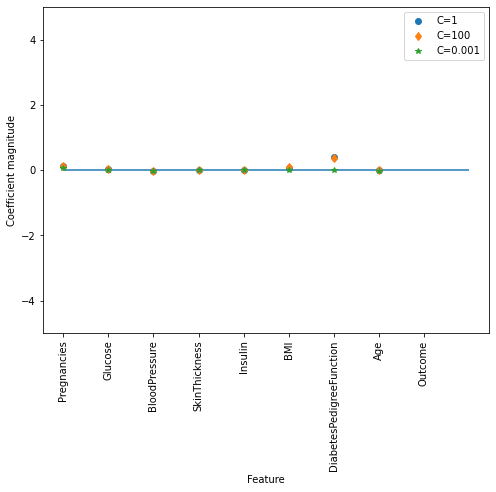

In [18]:
diabetes_features = [x for i, x in enumerate(diabetes.columns) if i != 17]

plt.figure(figsize=(8, 6))
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, 'd', label="C=100")
plt.plot(logreg001.coef_.T, '*', label="C=0.001")
plt.xticks(range(diabetes.shape[1]), diabetes_features, rotation=90)
plt.hlines(0, 0, diabetes.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()



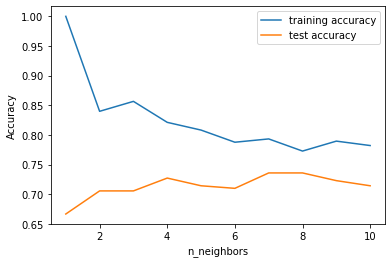

In [19]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)  # build the models
    knn.fit(x_train, y_train)  # use x_train as train data and y_train as target value
    training_accuracy.append(knn.score(x_train, y_train))  # record training set accuracy
    test_accuracy.append(knn.score(x_test, y_test))  # record test set accuracy

'''
The relationship between the training set and the test set on the model prediction
accuracy (Y-axis) and the number of nearest neighbors (X-axis) is demonstrated
'''
plt.figure()
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


In [20]:
x_train = x_train.astype(np.float64)
y_train = y_train.astype(np.float64)
x_test = x_test.astype(np.float64)
y_test = y_test.astype(np.float64)


In [21]:
#调用svm算法，拟合模型
from sklearn import svm
svc = svm.SVC(C=100, kernel='linear')
svc.fit(x_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(x_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(x_test, y_test)))


Accuracy on training set: 0.79
Accuracy on test set: 0.73


In [ ]:
#支持向量机，速度太慢
x=[10,20,30,40,50,60,70,80,90,100,110]  
C_svm = [1,10,20,50,80,100,200,500,1000,1500,2000]
train_acc_svm = []
test_acc_svm = []

for k4 in C_svm:
    svc = svm.SVC(C=k4, kernel='linear')
    a = svc.fit(x_train, y_train)
    
    train_acc_svm.append(a.score(x_train, y_train))
    test_acc_svm.append(a.score(x_test, y_test))

plt.figure(figsize=(8,5))
plt.plot(x,train_acc_svm,label='Train_acc')
plt.plot(x,test_acc_svm,label='test_acc')
_ = plt.xticks(x,C_svm) 
plt.legend()
plt.title('Acc for SVM')
plt.xlabel('C_svm')
plt.ylabel('ACC')

In [53]:
## Baseline model performance evaluation
# kf = KFold(n_splits=5, shuffle=True, random_state=SEED)   # this may result in imbalance classes in each fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

# to give model baseline report in dataframe 
def baseline_report(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    accuracy     = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy'))#cv交叉验证折数
    precision    = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='precision'))
    recall       = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='recall'))
    f1score      = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='f1'))
    rocauc       = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc'))
    y_pred = model.predict(X_test)
    logloss      = log_loss(y_test, y_pred)   # SVC & LinearSVC unable to use cvs

    df_model = pd.DataFrame({'model'        : [name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'rocauc'       : [rocauc],
                             'logloss'      : [logloss],
                             'timetaken'    : [0]       })   # timetaken: to be used for comparison later
    return df_model

# to evaluate baseline models
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()
logit = LogisticRegression()
knn = KNeighborsClassifier()
decisiontree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
svc = SVC()
linearsvc = LinearSVC()

# to concat all models
df_models = pd.concat([baseline_report(gnb, x_train, x_test, y_train, y_test, 'GaussianNB'),
                       baseline_report(bnb, x_train, x_test, y_train, y_test, 'BernoulliNB'),
                       baseline_report(mnb, x_train, x_test, y_train, y_test, 'MultinomialNB'),
                       baseline_report(logit, x_train, x_test, y_train, y_test, 'LogisticRegression'),
                       baseline_report(knn, x_train, x_test, y_train, y_test, 'KNN'),
                       baseline_report(decisiontree, x_train, x_test, y_train, y_test, 'DecisionTree'),
                       baseline_report(randomforest, x_train, x_test, y_train, y_test, 'RandomForest'),
                       baseline_report(svc, x_train, x_test, y_train, y_test, 'SVC'),
                       baseline_report(linearsvc, x_train, x_test, y_train, y_test, 'LinearSVC')
                       ], axis=0).reset_index()

df_models = df_models.drop('index', axis=1)
df_models

,model,accuracy,precision,recall,f1score,rocauc,logloss,timetaken
0,GaussianNB,0.756213,0.690960,0.572546,0.620427,0.804680,9.120723,0
1,BernoulliNB,0.627639,0.287912,0.042674,0.072428,0.534802,11.662468,0
2,MultinomialNB,0.603358,0.424830,0.465007,0.440655,0.549285,14.652984,0
3,LogisticRegression,0.759882,0.701894,0.561878,0.619789,0.801654,9.120702,0
4,KNN,0.713257,0.611105,0.513940,0.554626,0.749791,9.868312,0
5,DecisionTree,0.661094,0.510688,0.481366,0.512252,0.631197,8.672167,0
6,RandomForest,0.767307,0.719574,0.556330,0.592935,0.809472,8.971197,0
7,SVC,0.757979,0.748089,0.476245,0.578191,0.796588,8.821641,0
8,LinearSVC,0.593977,0.340937,0.205121,0.365666,0.580030,12.111000,0


In [ ]:

LG_score = []

In [ ]:
logit = LogisticRegression()
knn = KNeighborsClassifier()
svc = svm.SVC(kernel='linear')
randomforest = RandomForestClassifier()
model1 = logit.fit(x_train, y_train)
model2 = knn.fit(x_train, y_train)
model3 = svc.fit(x_train, y_train)
model4 = randomforest.fit(x_train, y_train)
def baseline_report_arr(X_train, X_test, y_train, y_test, name):
    arr_score = []#存放每个评估值的数组
    arr_score.append(np.mean(cross_val_score(model1,X_train, y_train, cv=kf, scoring=name)))
    arr_score.append(np.mean(cross_val_score(model2,X_train, y_train, cv=kf, scoring=name)))
    arr_score.append(np.mean(cross_val_score(model3,X_train, y_train, cv=kf, scoring=name)))#cv交叉验证折数
    arr_score.append(np.mean(cross_val_score(model4,X_train, y_train, cv=kf, scoring=name)))
    return arr_score
baseline_report_arr(x_train, x_test, y_train, y_test, 'accuracy')
baseline_report_arr(x_train, x_test, y_train, y_test, 'precision')

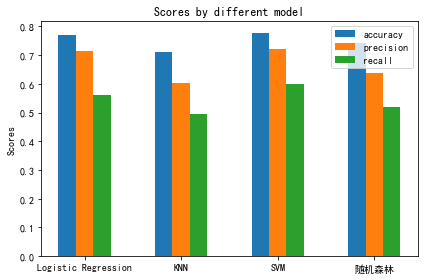

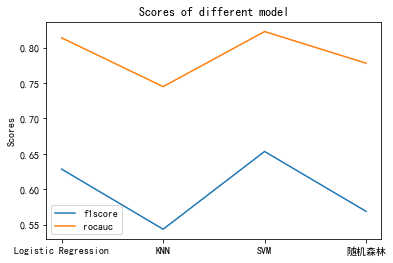

In [35]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
labels = ['Logistic Regression','KNN','SVM','随机森林']
accuracy = baseline_report_arr(x_train, x_test, y_train, y_test, 'accuracy')
precision = baseline_report_arr(x_train, x_test, y_train, y_test, 'precision')
recall = baseline_report_arr(x_train, x_test, y_train, y_test, 'recall')
f1score = baseline_report_arr(x_train, x_test, y_train, y_test, 'f1')
rocauc = baseline_report_arr(x_train, x_test, y_train, y_test, 'roc_auc')

x = np.arange(len(labels))  # the label locations
width = 0.18  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x-width, accuracy, width, label='accuracy')
rects2 = ax.bar(x, precision, width, label='precision')
rects3 = ax.bar(x+width, recall, width, label='recall')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by different model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()

fig1, ax1 = plt.subplots()
ax1.plot(labels, f1score, label="f1score")
ax1.plot(labels, rocauc, label="rocauc")
ax1.set_ylabel('Scores')
ax1.set_title('Scores of different model')
ax1.legend()
plt.show()

In [57]:
logloss = []
y_pred1 = model1.predict(x_test)
y_pred2 = model2.predict(x_test)
y_pred3 = model3.predict(x_test)
logloss.append(log_loss(y_test, y_pred1))
logloss.append(log_loss(y_test, y_pred2))
logloss.append(log_loss(y_test, y_pred3))
logloss

[9.120701955132406, 9.868311825096495, 9.41974590311804]

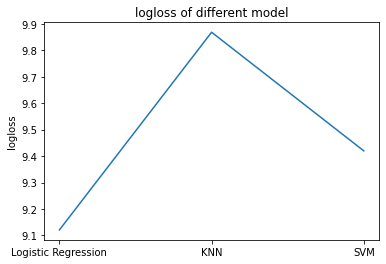

In [60]:
fig1, ax1 = plt.subplots()
ax1.set_ylabel('logloss')
ax1.set_title('logloss of different model')
ax1.plot(labels, logloss, label="f1score")